In [5]:
#import libraries

from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib


<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){retu
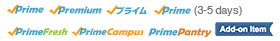

In [9]:
#connect to website
URL = 'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ?customId=B07535Y9T6&customizationToken=MC_Assembly_1%23B07535Y9T6&th=1&psc=1'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(URL, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")

soup2 = BeautifulSoup(soup1.prettify(),"html.parser")

print(soup2)


In [10]:
title1 = soup2.find(id='productTitle').get_text()
print(title1)


                   Funny Got Data MIS Data Systems Business Analyst T-Shirt
                  


In [11]:
rating = soup2.find(class_='a-size-base').get_text()
print(rating)


                      4.3
                     


In [12]:
title1 = title1.strip()
rating = rating.strip()
print(title1)
print(rating)

Funny Got Data MIS Data Systems Business Analyst T-Shirt
4.3


In [13]:
import datetime
today = datetime.date.today()

print(today)

2023-08-31


In [14]:
import csv

header = ['title1','rating', 'Date']
data = (title1, rating, today)

with open('AmazonwebscraperDataset1.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [ ]:
import pandas as pd
df = pd.read_csv('AmazonwebscraperDataset1.csv')
print(df)

In [18]:
# Now we are appending data to the csv

with open('AmazonwebscraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)


In [19]:
import pandas as pd
df = pd.read_csv('AmazonwebscraperDataset1.csv')
print(df)

                                              title1  rating        Date
0  Funny Got Data MIS Data Systems Business Analy...     4.3  2023-08-31


In [20]:
#Combine all of the above code into one function

def check_price():
    URL = 'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1'

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(URL, headers=headers)

    soup1 = BeautifulSoup(page.content, "html.parser")

    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

    title = soup2.find(id='productTitle').get_text()

    price = soup2.find(id='priceblock_ourprice').get_text()

    price = price.strip()[1:]
    title = title.strip()

    import datetime

    today = datetime.date.today()
    
    import csv 

    header = ['Title', 'Price', 'Date']
    data = [title, price, today]

    with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)

In [ ]:
# Runs check_price after a set time and inputs data into your CSV

while(True):
    check_price()
    time.sleep(86400)

In [ ]:
import pandas as pd

df = pd.read_csv(r'C:\Users\alexf\AmazonWebScraperDataset.csv')

print(df)

In [ ]:
# If uou want to try sending yourself an email when a price hits below a certain level you can try it out with this script

def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('khunt398607@gmail.com','xxxxxxxxxxxxxx')
    
    subject = "The Shirt you want is below $15! Now is your chance to buy!"
    body = "jay, This is the moment we have been waiting for. Now is your chance to pick up the shirt of your dreams. Don't mess it up! Link here: https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data+analyst+tshirt&qid=1626655184&sr=8-3"
   
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'khunt398607@gmail.com',
        msg
     
    )